In [35]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
os.chdir('/home/javak/phasenet_chile-subduction-zone')
PROJECT_ROOT = os.getcwd()

In [36]:
# Load events catalog
os.chdir('/home/javak/Sample_data_chile')
CATALOG_ROOT = os.getcwd()
catalog_txt = pd.read_csv(os.path.join(CATALOG_ROOT, "Events_catalog/IPOC_2007_2020_picks.txt"), sep="\t")
export_fig_path ='/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog'

In [37]:
import pickle


with open(os.path.join(export_fig_path, "result_PhaseNet.pkl"),'rb') as fp:
    PhaseNet_result = pickle.load(fp)

#tr = PhaseNet_result.stream[11]
#tr[0].stats.endtime
PhaseNet_result


network_station_PN = PhaseNet_result.index.to_series().str.split(".").str[:2].str.join(".")
min_p_picks = min([t.timestamp.min()for t in PhaseNet_result.P_waves])
min_s_picks = min([t.timestamp.min()for t in PhaseNet_result.S_waves])
min_s_p = min(min_p_picks,min_s_picks)

max_p_picks = max([t.timestamp.max()for t in PhaseNet_result.P_waves])
max_s_picks = max([t.timestamp.max()for t in PhaseNet_result.S_waves])
max_s_p = max(min_p_picks,min_s_picks)
max_s_p
PhaseNet_result.index[2][0:7]



'CX.PB11'

In [38]:
import pickle

dt=7000
with open(os.path.join(export_fig_path, "events.pkl"),'rb') as fp:
    events = pickle.load(fp)
events

'''
for i in range(0, events.shape[0]):
    print(i)
    tr = PhaseNet_result.stream[i]
    
    mask_picks_time = (events['picks_time']> tr[0].stats.starttime) & (events['picks_time']<tr[0].stats.starttime+dt)

#new_df_p_waves = df_p_waves.loc[mask_p]
#new_df_s_waves = df_s_waves.loc[mask_s]
'''

events['network_station']=events['network_code'].astype(str)+'.'+events['station_code']
events

,picks_time,picks_uncertainty,network_code,station_code,phase_hint,origins_time,origins_longitude,origins_latitude,magnitudes,network_station
0,2012-01-01T00:13:12.880000Z,0.02,CX,PB11,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB11
1,2012-01-01T00:13:17.180000Z,0.02,CX,PB07,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB07
2,2012-01-01T00:13:27.470000Z,0.04,CX,PB12,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB12
3,2012-01-01T00:13:13.750000Z,0.03,CX,PB02,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB02
4,2012-01-01T00:13:28.610000Z,0.09,CX,PB02,S,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB02
...,...,...,...,...,...,...,...,...,...,...
491,2012-01-01T21:38:33.580000Z,0.02,CX,PB08,P,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.PB08
492,2012-01-01T21:38:45.210000Z,0.06,CX,PB08,S,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.PB08
493,2012-01-01T21:38:35.880000Z,0.04,CX,MNMCX,P,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.MNMCX
494,2012-01-01T21:38:48.260000Z,0.12,CX,MNMCX,S,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.MNMCX


In [39]:
tr =obspy.read(os.path.join(CATALOG_ROOT, "mseed/CX.PB01.00.NEZ.D.2012.001"), sep="\t")

df_sub = events[(events['picks_time']> tr[0].stats.starttime) & (events['picks_time']< tr[0].stats.endtime)] 

B='network_station'
df_sub = df_sub[(df_sub[B]=="CX.PB11") & (df_sub['phase_hint']=="P")]
df_sub


,picks_time,picks_uncertainty,network_code,station_code,phase_hint,origins_time,origins_longitude,origins_latitude,magnitudes,network_station
0,2012-01-01T00:13:12.880000Z,0.02,CX,PB11,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB11
28,2012-01-01T01:14:48.810000Z,0.02,CX,PB11,P,2012-01-01T01:14:11.800000Z,-68.0123,-21.1727,2.7,CX.PB11
53,2012-01-01T02:53:38.010000Z,0.03,CX,PB11,P,2012-01-01T02:52:59.230000Z,-68.3449,-21.8695,2.4,CX.PB11
63,2012-01-01T04:40:51.360000Z,0.02,CX,PB11,P,2012-01-01T04:40:25.730000Z,-69.1587,-21.1499,1.9,CX.PB11
71,2012-01-01T05:15:49.590000Z,0.01,CX,PB11,P,2012-01-01T05:15:20.460000Z,-68.6190,-21.0507,2.3,CX.PB11
86,2012-01-01T05:20:49.970000Z,0.01,CX,PB11,P,2012-01-01T05:20:19.500000Z,-68.5484,-21.1561,2.4,CX.PB11
114,2012-01-01T05:32:56.180000Z,0.02,CX,PB11,P,2012-01-01T05:32:20.770000Z,-68.6401,-21.7473,2.7,CX.PB11
116,2012-01-01T05:36:11.850000Z,0.02,CX,PB11,P,2012-01-01T05:35:56.380000Z,-70.0266,-20.3875,2.4,CX.PB11
140,2012-01-01T06:36:33.510000Z,0.01,CX,PB11,P,2012-01-01T06:36:16.260000Z,-69.0195,-19.9866,2.2,CX.PB11
151,2012-01-01T07:04:56.640000Z,0.01,CX,PB11,P,2012-01-01T07:04:33.640000Z,-68.9443,-20.6388,3.0,CX.PB11


In [40]:
print([obspy.UTCDateTime(t).matplotlib_date for t in df_sub['picks_time'].tolist()])
#df_sub['picks_time']
v=df_sub['picks_time'].iloc[3]
#obspy.UTCDateTime(v).matplotlib_date


[15340.009176851852, 15340.051953819444, 15340.120578819444, 15340.195038888887, 15340.219323958332, 15340.222800578704, 15340.231205787039, 15340.23347048611, 15340.275387847221, 15340.295100000001, 15340.366720833334, 15340.38938761574, 15340.410483912035, 15340.469919791665, 15340.561915972221, 15340.58520324074, 15340.647195254631, 15340.649869560186, 15340.682154629631, 15340.729922685185, 15340.732071875, 15340.774696643519, 15340.838262037036, 15340.90176574074]


In [41]:
working_traj = '/home/javak/Sample_data_chile'

stream_traj =[os.path.join(os.path.join(working_traj, "mseed"), t) for t in os.listdir(os.path.join(working_traj, "mseed"))]
stream = obspy.read(stream_traj[0])
stream[0].times
stream[0].max()




61890

In [73]:
with open(os.path.join(export_fig_path, "result_PhaseNet.pkl"),'rb') as fp:
    PhaseNet_result = pickle.load(fp)

c = PhaseNet_result.S_waves.iloc[0]
#c.iloc[2:8]
c

,id,timestamp,prob,type
57,CX.PB16.00.NEZ.D.2012.001,2012-01-01T00:14:14.150,0.676654,s
58,CX.PB16.00.NEZ.D.2012.001,2012-01-01T00:53:04.850,0.703104,s
59,CX.PB16.00.NEZ.D.2012.001,2012-01-01T03:14:00.460,0.736471,s
60,CX.PB16.00.NEZ.D.2012.001,2012-01-01T03:14:21.120,0.383134,s
61,CX.PB16.00.NEZ.D.2012.001,2012-01-01T03:14:39.670,0.809815,s
62,CX.PB16.00.NEZ.D.2012.001,2012-01-01T03:38:24.090,0.494756,s
63,CX.PB16.00.NEZ.D.2012.001,2012-01-01T04:26:39.950,0.695388,s
64,CX.PB16.00.NEZ.D.2012.001,2012-01-01T05:05:04.540,0.463688,s
65,CX.PB16.00.NEZ.D.2012.001,2012-01-01T05:16:08.640,0.561848,s
66,CX.PB16.00.NEZ.D.2012.001,2012-01-01T05:21:09.170,0.820341,s


..........................
0
..........................


AttributeError: 'numpy.int32' object has no attribute 'times'

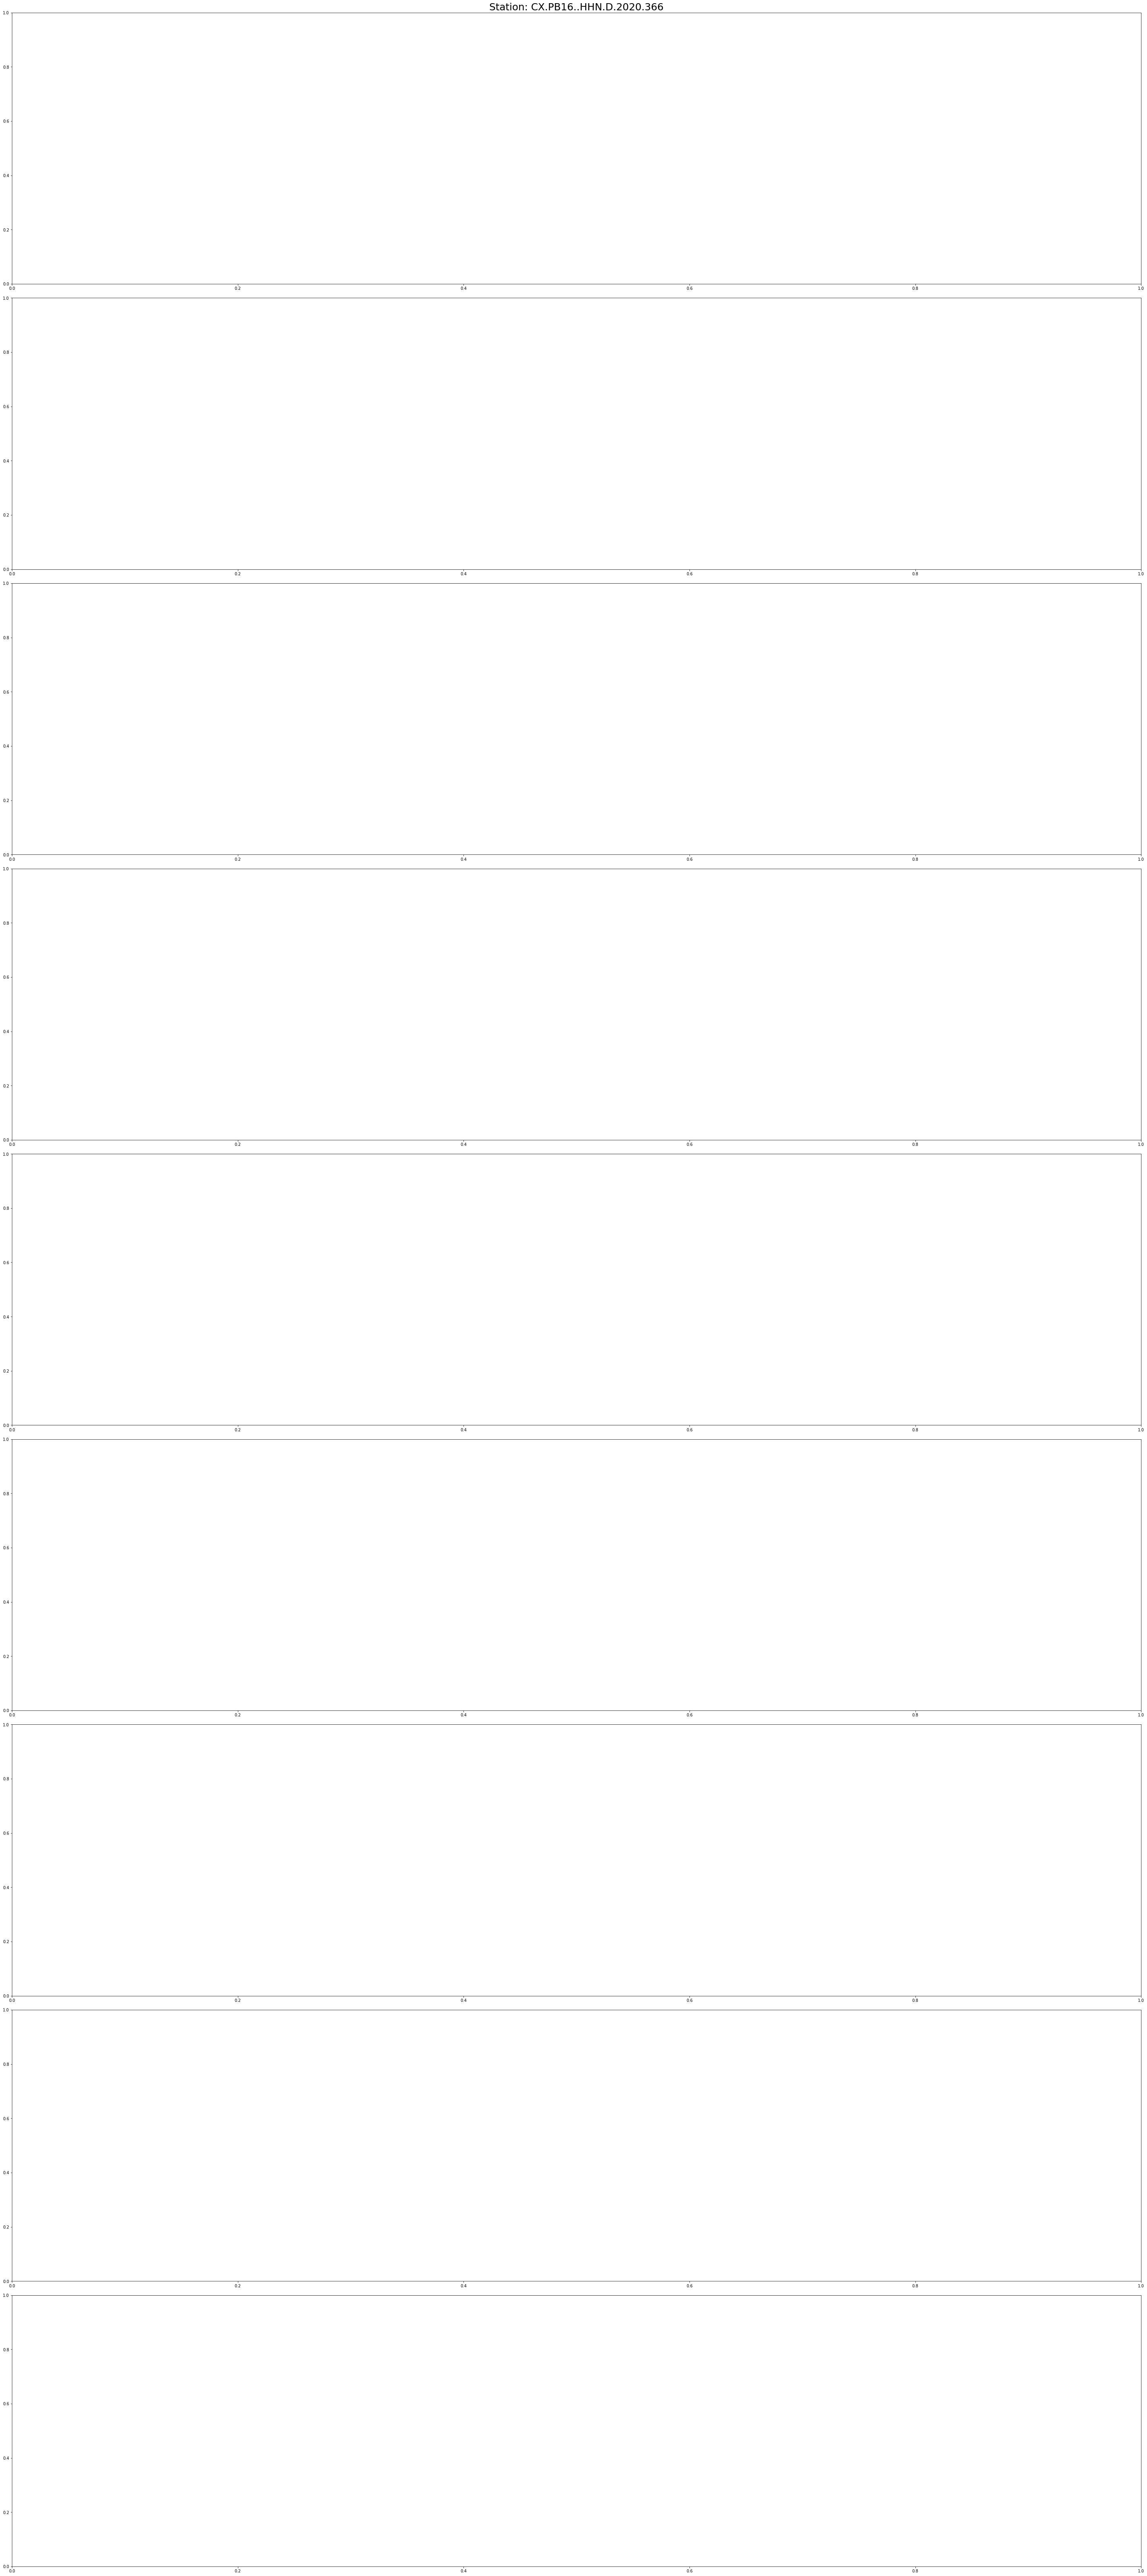

In [51]:
        import obspy
        # creat a trajectory list of mseed files in mseed folder
        stream_traj =[os.path.join(os.path.join(working_traj, "mseed"), t) for t in os.listdir(os.path.join(working_traj, "mseed"))]

        # Read and slice data from Obspy
        #stream = [data_slicing (starttime, dt, t) for t in stream_traj]

        # Appy filter
        #stream = [apply_filter (t) for t in stream]

        # Read pickle data (PhaseNet result picks)
        with open(os.path.join(export_fig_path, "result_PhaseNet.pkl"),'rb') as fp:
            PhaseNet_result = pickle.load(fp)

        # Remove streams which are empty
        #PhaseNet_result= PhaseNet_result[PhaseNet_result['stream'].map(lambda d: len(d)) > 0]

        fig, ax = plt.subplots(PhaseNet_result.shape[0]*3,1,figsize=(40,90),constrained_layout = True)

        for i in range (0,PhaseNet_result.shape[0]):
            #stream = obspy.read(stream_traj[i])

            #stream = self.data_slicing (self.starttime, self.dt, stream)
            #stream = self.apply_filter (stream)
            #print(stream)
            st = stream[i]
            print('..........................') 
            print(i) 
            print('..........................')           
            ax[3*i].set_title(fontsize=25,label="Station: {}".format(PhaseNet_result.index[i]), fontdict=None, loc='center')
            ax[3*i].plot(st[0].times('matplotlib'), st[0].data, 
                        markersize=1, label = 'E Stream', color = 'k')
            ax[3*i+1].plot(st[1].times('matplotlib'), st[1].data,
                        markersize=1, label = 'N Stream', color = 'k')
            ax[3*i+2].plot(st[2].times('matplotlib'), st[2].data,
                        markersize=1, label = 'Z Stream', color = 'k')

            
            plt.setp(ax[3*i].get_xticklabels(), visible=False)
            plt.setp(ax[3*i+1].get_xticklabels(), visible=False)
            

            # Draw P waves imported from PhaseNet
            ax[3*i].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.P_waves[i]['timestamp']], 
                ymin = (-st[0].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
                ymax = (st[0].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
                color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
            ax[3*i].xaxis_date()

            ax[3*i+1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.P_waves[i]['timestamp']], 
                ymin = (-st[1].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
                ymax = ( st[1].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
                color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
            ax[3*i+1].xaxis_date()

            ax[3*i+2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.P_waves[i]['timestamp']], 
                ymin = (-st[2].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
                ymax = ( st[2].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
                color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
            ax[3*i+2].xaxis_date()


            
            # Draw S waves imported from PhaseNet
            ax[3*i].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.S_waves[i]['timestamp']], 
                ymin = (-st[0].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
                ymax = ( st[0].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
                color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
            ax[3*i].xaxis_date()

            ax[3*i+1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.S_waves[i]['timestamp']], 
                ymin = (-st[1].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
                ymax = ( st[1].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
                color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
            ax[3*i+1].xaxis_date()

            ax[3*i+2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.S_waves[i]['timestamp']], 
                ymin = (-st[2].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
                ymax = ( st[2].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
                color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
            ax[3*i+2].xaxis_date()

            ax[3*i].legend(loc='lower right')
            ax[3*i+1].legend(loc='lower right')
            ax[3*i+2].legend(loc='lower right')
        file_name = '{0}.{extention}'.format('PhaseNet_result', extention='png')
        fig.savefig(os.path.join(export_fig_path, file_name), facecolor = 'w')